In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston_dataset = datasets.load_boston()

In [3]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
data = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

### Observing some data!

In [5]:
data["MEDV"] = boston_dataset.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f676cf12590>,
      dtype=object)

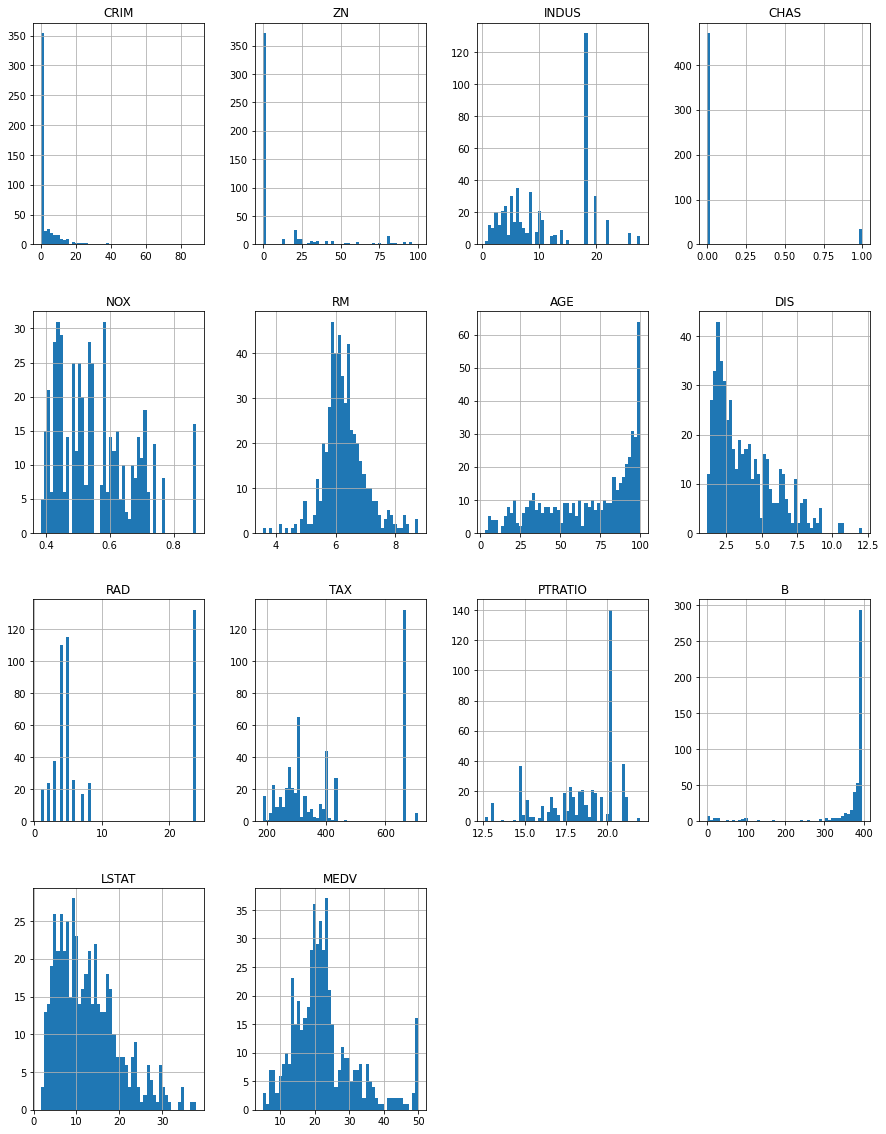

In [9]:
data.hist(bins = 50, figsize = (15, 20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


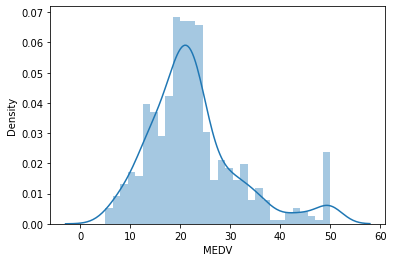

In [10]:
sns.distplot(data["MEDV"], bins = 30)
plt.show()

It is a normal distribution with some outliers.

### Correlation!

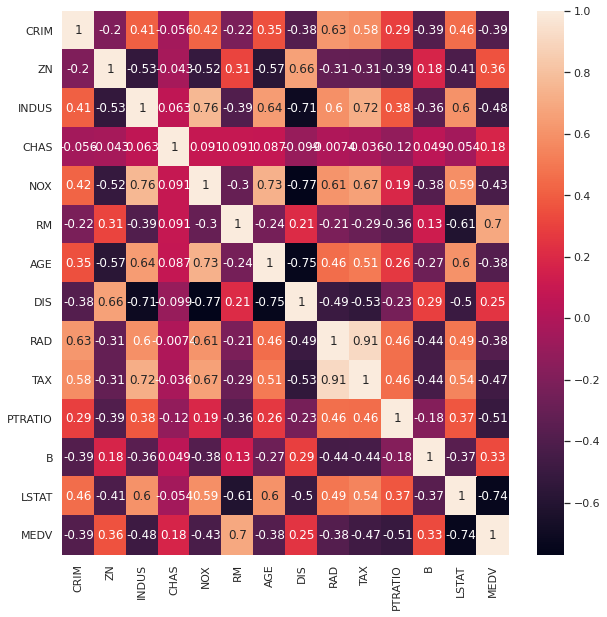

In [11]:
corr_matrix = data.corr()
sns.set(rc = {'figure.figsize' : (10, 10)})
sns.heatmap(data = corr_matrix, annot = True)

As can be seen, MEDV, the target, has high -ve correlation with feature LSTAT and high +ve correlation with feature RM.

Also, multi collinearity between other features should be checked, and if high, the features should be avoided **together**. (RAD and TAX)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f675f8c2f50>,
      dtype=object)

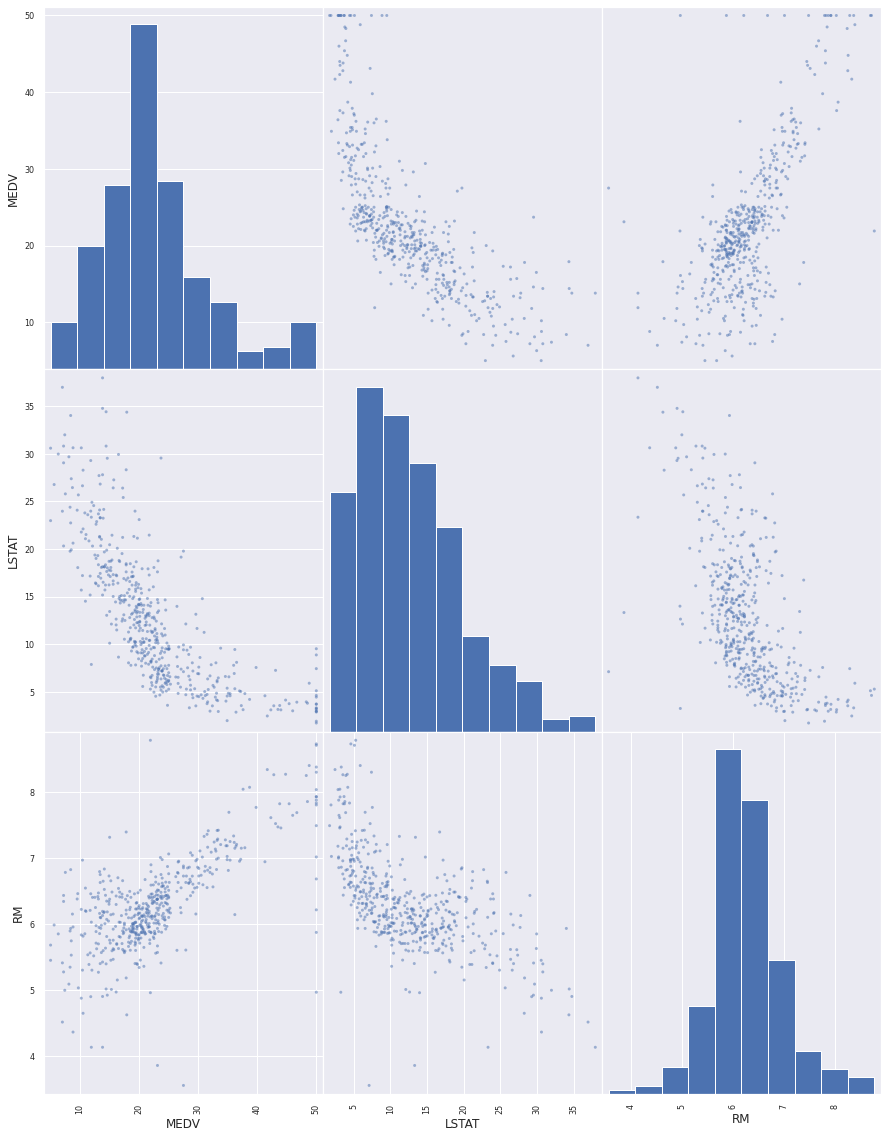

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "LSTAT", "RM"]

scatter_matrix(data[attributes], figsize = (15, 20))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
class LinearRegression():
    def __init__(self, lr = 0.001, epochs = 10):
        """ Initialize model with learning rate
            and epochs."""
        self.lr = lr
        self.epochs = epochs

    def analytical_fit(self, x_train, y_train):
        """Fit the data using the analytical solution for linear regression."""
        assert x_train.shape[0] == y_train.shape[0]
        self.x = x_train # dimensions: (examples x (features + 1))
        self.y = y_train # dimensions: (examples x 1)
        self.w = np.random.randn(self.x.shape[1], 1)
        self.w = np.linalg.inv(self.x.T.dot(self.x)).dot(self.x.T).dot(self.y) # analytical solution = inv(xTx)xTy
                                                                               # dimensions: ((features + 1) x 1)

    def gd_fit(self, x_train, y_train, print_loss = False, print_weights = False):
        """Fit the data using gradient descent."""
        m = x_train.shape[0]
        self.w = np.random.randn(x_train.shape[1], 1)
        for i in range(self.epochs):
            fwd = self.predict(x_train).reshape(-1, 1)
            curr_w = self.w
            for j in range(self.w.shape[0]):
                # each x vector = (examples x 1)
                # weight is scalar
                # we calculate the fwd pass - y and then multiply by a particular feature x corresponding to that weight.
                diff = fwd - y_train.reshape(-1, 1)
                dloss = (1 / m) * diff.T.dot(x_train[:, j].reshape(-1, 1)).squeeze()
                curr_w[j] -= (self.lr * dloss)
            if print_loss:
                if (i + 1) % 100 == 0:
                    print(f"Epoch {i + 1} errors: ")
                    self.print_errors(self, x_train, y_train)
                    print("\n\n")
            self.w = curr_w
        if print_weights:
            print(self.w)
    
    def gd_fit_vectorized(self, x_train, y_train, print_loss = False, print_weights = False):
        
        m = x_train.shape[0]
        self.w = np.random.randn(x_train.shape[1], 1)
        for i in range(self.epochs):
            fwd = self.predict(x_train)
            diff = fwd - y_train.reshape(-1, 1) # examples x 1
            dvt = (1 / m) * diff.T.dot(x_train).T # features x 1
            self.w  = self.w - (self.lr * dvt)
            if print_loss:
                if (i + 1) % 100 == 0:
                    print(f"Epoch {i + 1} errors: ")
                    self.print_errors(self, x_train, y_train)
                    print("\n\n")
        if print_weights:
            print(self.w)

    def predict(self, x_test):
        """Predict data using given input and calculated weights."""
        preds = x_test.dot(self.w)  # dimensions: (examples x 1)
        return preds
    
    def errors(self, y_true, y_pred):
        r2score = r2_score(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared = False)
        mse = mean_squared_error(y_true, y_pred)
        return {'r2': r2score, 'rmse': rmse, 'mse': mse}
    
    @staticmethod
    def print_errors(model, x, y, return_preds = False):
        preds = model.predict(x)
        error = model.errors(y, preds)
        
        if return_preds:
            return preds
        
        
        print(f"R2 Score: {error['r2']}")
        print(f"RMSE: {error['rmse']}")
        print(f"MSE: {error['mse']}")

In [16]:
X = data[["LSTAT", "RM"]]
y = data[["MEDV"]]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
model = LinearRegression()
model.analytical_fit(X_train, y_train)

In [19]:
model.print_errors(model, X_train, y_train)

R2 Score: 0.6441543720456462
RMSE: 5.600516772688236
MSE: 31.365788121162254


In [20]:
print(X_test.shape)
print(y_test.shape)

(167, 2)
(167, 1)


In [21]:
model.print_errors(model, X_test, y_test)

R2 Score: 0.6182359587648436
RMSE: 5.375065877821898
MSE: 28.89133319092529


In [22]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(-1, 1)

In [23]:
def plot_train_test(model, feature_index):
    import matplotlib.patches as mpatches
    
    train_preds = model.print_errors(model, X_train, y_train, return_preds = True)
    
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[:, feature_index], y_train, color = "red")
    plt.scatter(X_train[:, feature_index], train_preds, color = "blue", alpha = 0.8)
    plt.title("Training Fit")
    plt.xlabel("feature")
    plt.ylabel("13")
    red_patch = mpatches.Patch(color = "red", label = "True")
    blue_patch = mpatches.Patch(color = "blue", label = "Predicted")
    plt.legend(handles=[red_patch, blue_patch])
               
    test_preds = model.print_errors(model, X_test, y_test, return_preds = True)

    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, feature_index], y_test, color = "red")
    plt.scatter(X_test[:, feature_index], test_preds, color = "blue", alpha = 0.8)
    plt.title("Test")
    plt.xlabel("feature")
    plt.ylabel("13")
    red_patch = mpatches.Patch(color = "red", label = "True")
    blue_patch = mpatches.Patch(color = "blue", label = "Predicted")
    plt.legend(handles=[red_patch, blue_patch])
    plt.show()

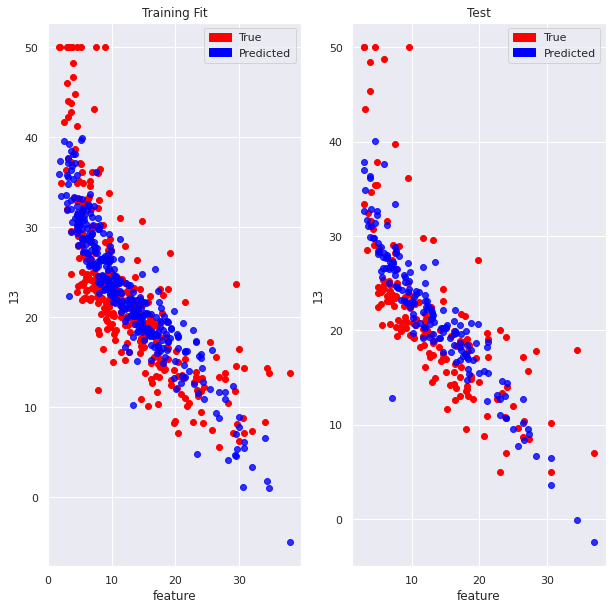

In [24]:
plot_train_test(model, 0)

Looks..... weird?

if u wanna input dataframes, just convert them to numpy arrays! 


In [25]:
gd_model = LinearRegression(epochs = 300)
gd_model.gd_fit_vectorized(X_train, y_train, print_weights = True, print_loss = True)

Epoch 100 errors: 
R2 Score: 0.27279454042885987
RMSE: 8.00618922617106
MSE: 64.09906592525756



Epoch 200 errors: 
R2 Score: 0.6054900788158073
RMSE: 5.896933764867739
MSE: 34.7738278272372



Epoch 300 errors: 
R2 Score: 0.6401288220434973
RMSE: 5.632105972328014
MSE: 31.720617683532886



[[-0.6051285 ]
 [ 4.78547344]]


In [26]:
model.w

array([[-0.66913506],
       [ 4.95115523]])

In [27]:
gd_model.print_errors(gd_model, X_train, y_train)

R2 Score: 0.6401288220434973
RMSE: 5.632105972328014
MSE: 31.720617683532886


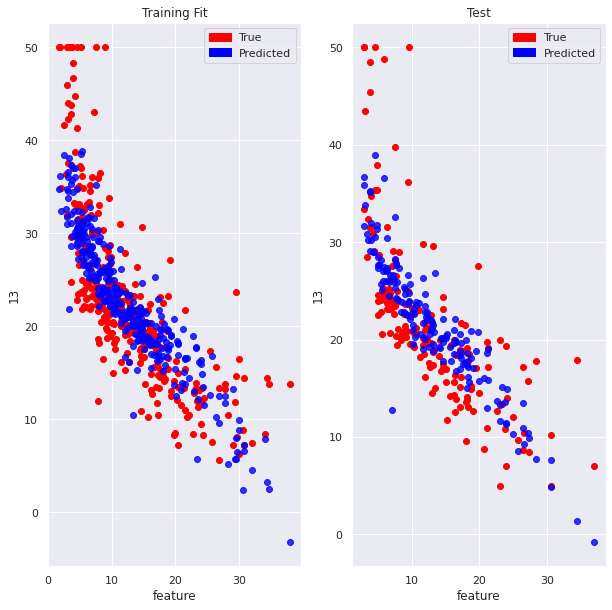

In [28]:
plot_train_test(gd_model, 0)

### Generating dataset from weights (To test model)

In [29]:
fixed_weights = np.array([1, 2, 3, 4, 5]).T.reshape(-1, 1)
fixed_weights

array([[1],
       [2],
       [3],
       [4],
       [5]])

###### Generating 500 X and y values by forming random (1, 5) vectors of X and multiplying with weights for y vector

In [30]:
x = []
y = []
for i in range(500):
    x0 = np.random.randn(1, fixed_weights.shape[0])
    x.append(x0)
    y0 = x0.dot(fixed_weights)
    y.append(y0)
assert(x[5].dot(fixed_weights) == y[5])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [32]:
X_train = np.asarray(X_train).reshape(-1, fixed_weights.shape[0])
y_train = np.asarray(y_train).reshape(-1, 1)
X_test = np.asarray(X_test).reshape(-1, fixed_weights.shape[0])
y_test = np.asarray(y_test).reshape(-1, 1)

In [33]:
sol_model = LinearRegression(epochs = 10)
sol_model.analytical_fit(X_train, y_train)

In [34]:
sol_model.print_errors(sol_model, X_test, y_test)

R2 Score: 1.0
RMSE: 2.208218431996332e-15
MSE: 4.87622864340834e-30


In [35]:
sol_model.w

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.]])

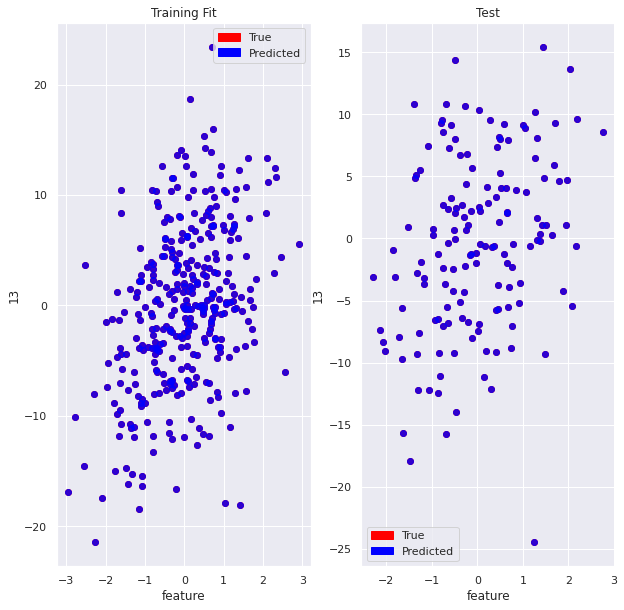

In [36]:
plot_train_test(sol_model, 2)

##### Analytical solution is perfect!!! ^^^^ Everything is predicted correctly :o

Comparing the timings between **Normal Gradient Descent** and **Vectorized Gradient Descent**

In [37]:
gd_model = LinearRegression(lr = 0.01, epochs = 300)
%time gd_model.gd_fit(X_train, y_train, print_weights = True)

[[0.82679058]
 [1.9626486 ]
 [2.79533679]
 [3.7539903 ]
 [4.85094595]]
CPU times: user 32.4 ms, sys: 5.22 ms, total: 37.6 ms
Wall time: 33.8 ms


In [38]:
gd_model_vectorized = LinearRegression(lr = 0.01, epochs = 300)
%time gd_model_vectorized.gd_fit_vectorized(X_train, y_train, print_weights = True)

[[0.86011275]
 [1.89653123]
 [2.8421082 ]
 [3.77903333]
 [4.72142933]]
CPU times: user 6.58 ms, sys: 984 µs, total: 7.57 ms
Wall time: 8.03 ms


### I mean, you see how much faster it is when vectorized O_O

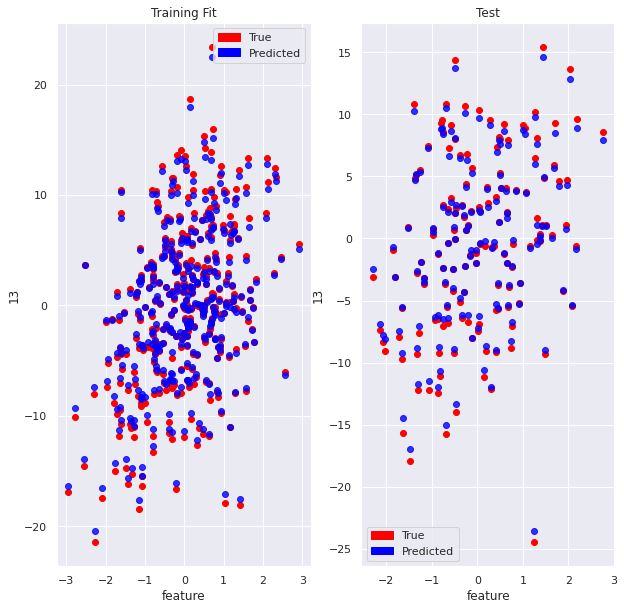

In [39]:
plot_train_test(gd_model, 2)

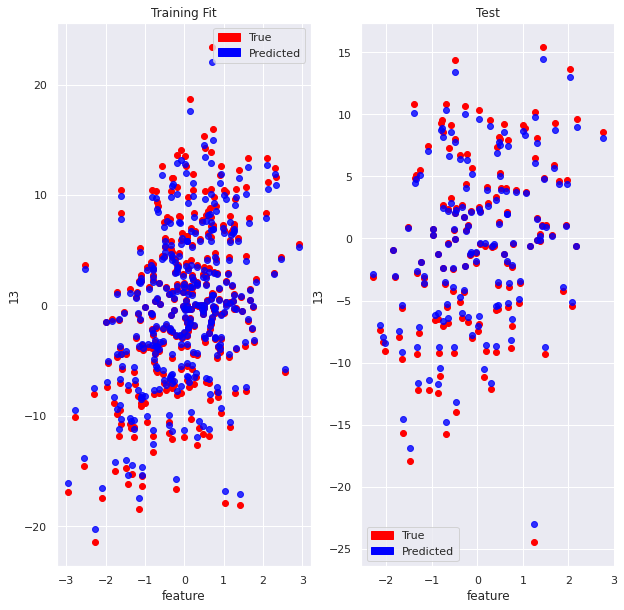

In [40]:
plot_train_test(gd_model_vectorized, 2)